### 하이퍼파라미터 튜닝

* 교차검증
* holdout
* k-fold cross validation
* stratified k-fold validation

#### 교차검증 구현하기

In [1]:
import numpy as np
from sklearn.model_selection import KFold

In [2]:
X = np.array([ 
    [1, 2], [3, 4], [1, 2], [3, 4]
])

y = np.array([1, 2, 3, 4])

In [3]:
X

array([[1, 2],
       [3, 4],
       [1, 2],
       [3, 4]])

In [4]:
y

array([1, 2, 3, 4])

In [5]:
# 2등분
kf = KFold(n_splits=2)

print(kf.get_n_splits(X))

2


In [6]:
print(kf)

KFold(n_splits=2, random_state=None, shuffle=False)


In [7]:
for train_idx, test_idx in kf.split(X):
    print('train idx: ', train_idx)
    print('test idx: ', test_idx)

train idx:  [2 3]
test idx:  [0 1]
train idx:  [0 1]
test idx:  [2 3]


In [8]:
for train_idx, test_idx in kf.split(X):
    print('--- idx')
    print(train_idx, test_idx)
    print('--- train data')
    print(X[train_idx])
    print('--- validation data')
    print(X[test_idx])

--- idx
[2 3] [0 1]
--- train data
[[1 2]
 [3 4]]
--- validation data
[[1 2]
 [3 4]]
--- idx
[0 1] [2 3]
--- train data
[[1 2]
 [3 4]]
--- validation data
[[1 2]
 [3 4]]


### KFold 

In [10]:
import pandas as pd

red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])

wine['taste'] = [1. if grade>5 else 0. for grade in wine['quality']]

X =wine.drop(['taste', 'quality'], axis=1)  
y = wine['taste']


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.7294593034442948
Test Acc :  0.7161538461538461


In [14]:
# KFold
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)
wine_tree_cv = DecisionTreeClassifier(max_depth=2, random_state=13)

* KFold 는 index 반환함

In [15]:
for train_idx, test_idx in kfold.split(X):
    print(len(train_idx), len(test_idx))

5197 1300
5197 1300
5198 1299
5198 1299
5198 1299


각각 fold 에 대한 학습 후 acc

In [17]:
# 모델 성능 각각 다름 확인
cv_accuracy = []

for train_idx, test_idx in kfold.split(X):
    X_train = X.iloc[train_idx]
    X_test = X.iloc[test_idx]

    # label
    y_train = y.iloc[train_idx]
    y_test = y.iloc[test_idx]

    wine_tree_cv.fit(X_train, y_train)
    pred = wine_tree_cv.predict(X_test)
    # print(pred)
    # print(accuracy_score(y_test, pred))
    cv_accuracy.append(accuracy_score(y_test, pred))

cv_accuracy

[0.6007692307692307,
 0.6884615384615385,
 0.7090069284064665,
 0.7628945342571208,
 0.7867590454195535]

--> validation data 에 대해 60% ~ 78% accuracy 가짐

* 각 acc의 분산이 크지 않다면 평균을 대표값으로

In [18]:
np.mean(cv_accuracy)

0.709578255462782

### Stratified KFold

In [19]:
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=5)
wine_tree_cv = DecisionTreeClassifier(max_depth=2, random_state=13)

cv_accuracy = []

for train_idx, test_idx in skfold.split(X, y):
    X_train = X.iloc[train_idx]
    X_test = X.iloc[test_idx]

    # label
    y_train = y.iloc[train_idx]
    y_test = y.iloc[test_idx]

    wine_tree_cv.fit(X_train, y_train)
    pred = wine_tree_cv.predict(X_test)
    # print(pred)
    # print(accuracy_score(y_test, pred))
    cv_accuracy.append(accuracy_score(y_test, pred))

cv_accuracy

[0.5523076923076923,
 0.6884615384615385,
 0.7143956889915319,
 0.7321016166281755,
 0.7567359507313318]

In [20]:
np.mean(cv_accuracy)

0.6888004974240539

--> acc의 평균이 더 나쁨

* cross validation을 보다 간편히

In [21]:
from sklearn.model_selection import cross_val_score

skfold = StratifiedKFold(n_splits=5)
wine_tree_cv = DecisionTreeClassifier(max_depth=2, random_state=13)

cross_val_score(wine_tree_cv, X, y, cv=skfold)

array([0.55230769, 0.68846154, 0.71439569, 0.73210162, 0.75673595])

In [22]:
from sklearn.model_selection import cross_val_score

skfold = StratifiedKFold(n_splits=5)
wine_tree_cv = DecisionTreeClassifier(max_depth=5, random_state=13)

cross_val_score(wine_tree_cv, X, y, cv=skfold)

array([0.50076923, 0.62615385, 0.69745958, 0.7582756 , 0.74903772])

In [23]:
def skfold_dt(depth):
    from sklearn.model_selection import cross_val_score

    skfold = StratifiedKFold(n_splits=5)
    wine_tree_cv = DecisionTreeClassifier(max_depth=depth, random_state=13)

    print(cross_val_score(wine_tree_cv, X, y, cv=skfold))

In [174]:
skfold_dt(3)

[0.56846154 0.68846154 0.71439569 0.73210162 0.75673595]


--> depth 높다고 무조건 acc 좋아지는 거 아님

In [24]:
# train score와 함께 보기
# 과적합 현상도 함께 볼 수 있음

from sklearn.model_selection import cross_validate

cross_validate(wine_tree_cv, X, y, cv=skfold, return_train_score=True)

{'fit_time': array([0.01893783, 0.01695013, 0.01721597, 0.01678371, 0.01669383]),
 'score_time': array([0.00135612, 0.00129366, 0.00122333, 0.00112796, 0.00105691]),
 'test_score': array([0.50076923, 0.62615385, 0.69745958, 0.7582756 , 0.74903772]),
 'train_score': array([0.78795459, 0.78045026, 0.77568295, 0.76356291, 0.76279338])}

## 하이퍼파라미너 튜닝
* 모델의 성능을 확보하기 위해 조절하는 설정 값

### GridSearch CV
* cv: cross validation

In [26]:
# GridSearch: DT model의 하이퍼파라미터를 수정
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {'max_depth': [2, 4, 7, 10]}

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)

In [27]:
gridsearch = GridSearchCV(estimator=wine_tree, param_grid=params, cv=5)
gridsearch.fit(X, y)  # train, test split 알아서 해줌

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=2, random_state=13),
             param_grid={'max_depth': [2, 4, 7, 10]})

In [28]:
# 결과
import pprint

pp = pprint.PrettyPrinter(indent=4)
pp.pprint(gridsearch.cv_results_)

{   'mean_fit_time': array([0.00844555, 0.01386018, 0.02305622, 0.03067336]),
    'mean_score_time': array([0.00134435, 0.00117025, 0.00124402, 0.00116043]),
    'mean_test_score': array([0.6888005 , 0.66356523, 0.65340854, 0.64401587]),
    'param_max_depth': masked_array(data=[2, 4, 7, 10],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object),
    'params': [   {'max_depth': 2},
                  {'max_depth': 4},
                  {'max_depth': 7},
                  {'max_depth': 10}],
    'rank_test_score': array([1, 2, 3, 4], dtype=int32),
    'split0_test_score': array([0.55230769, 0.51230769, 0.50846154, 0.51615385]),
    'split1_test_score': array([0.68846154, 0.63153846, 0.60307692, 0.60076923]),
    'split2_test_score': array([0.71439569, 0.72363356, 0.68360277, 0.66743649]),
    'split3_test_score': array([0.73210162, 0.73210162, 0.73672055, 0.71054657]),
    'split4_test_score': array([0.75673595, 0.7182448 , 0.73518091, 0.7251732

--> max depth 2인 게 1등 함(rank_test_score)

In [29]:
# 최적 성능 가진 모델
gridsearch.best_estimator_

DecisionTreeClassifier(max_depth=2, random_state=13)

In [30]:
gridsearch.best_score_  # %

0.6888004974240539

In [184]:
gridsearch.best_params_

{'max_depth': 2}

In [32]:
# 파이프라인을 적용한 모델에 GridSearch 적용 
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

estimators = [('scaler', StandardScaler()), ('clf', DecisionTreeClassifier(random_state=13))]

pipe = Pipeline(estimators)

In [185]:
param_grid = [{'clf__max_depth': [2, 4, 7, 10]}]

GridSearch = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5)
GridSearch.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf',
                                        DecisionTreeClassifier(max_depth=2,
                                                               random_state=13))]),
             param_grid=[{'clf__max_depth': [2, 4, 7, 10]}])

In [33]:
# scikit downgrade
param_grid = [{'clf__max_depth': [2, 4, 7, 10]}]

GridSearch = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5)
GridSearch.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf',
                                        DecisionTreeClassifier(random_state=13))]),
             param_grid=[{'clf__max_depth': [2, 4, 7, 10]}])

In [186]:
GridSearch.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

In [187]:
GridSearch.best_score_

0.6888004974240539

* 표로 성능 결과 정리

In [189]:
import pandas as pd

score_df = pd.DataFrame(GridSearch.cv_results_)
score_df[['params', 'rank_test_score', 'mean_test_score', 'std_test_score']]

,params,rank_test_score,mean_test_score,std_test_score
0,{'clf__max_depth': 2},1,0.688800,0.071799
1,{'clf__max_depth': 4},2,0.663565,0.083905
2,{'clf__max_depth': 7},3,0.653408,0.086993
3,{'clf__max_depth': 10},4,0.644016,0.076915


gridsearch를 plot_tree로 표현

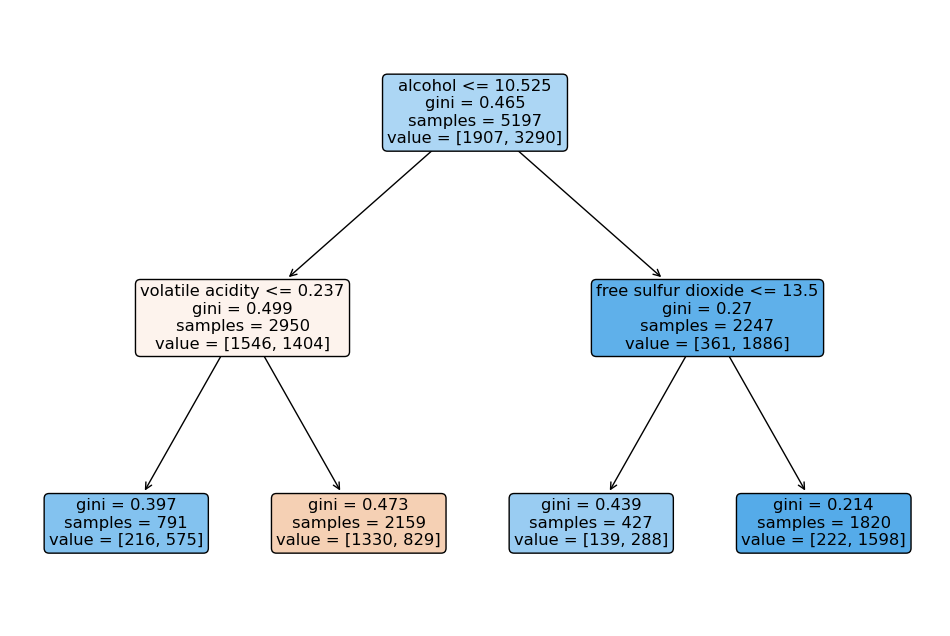

In [34]:
import matplotlib.pyplot as plt
import sklearn.tree as tree

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
tree.plot_tree(wine_tree, feature_names=X.columns, rounded=True, filled=True);
